In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [5]:
import re
import string

In [6]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [7]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [8]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [9]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [10]:
import nltk

In [11]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [13]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [15]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [16]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [17]:
from collections import Counter
vocab = Counter()

In [18]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [19]:
tokens = [key for key in vocab if vocab[key] > 10]

In [20]:
len(vocab)

15949

In [21]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [22]:
X = data['tweet']
y = data['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train

791     shot iphon x iphon appl iphonex wonder selfi p...
7278    congrat rabon bower love fish much ipod touch ...
1735    gain follow rt must follow follow back follow ...
1162    go drain doubleexposuremumbai mumbairain monso...
4871    love poem love app … photographi rt woman poem...
                              ...                        
3007    finallllyyi thank much dad gosia new phone bye...
6125    prepar dinner appl chiken lemon grapeseedoli d...
3187    pick new phone today excit use note phone exci...
6903    vivoindia exactli happen today sale sent mail ...
6888    sometim cant explain love babecaughtmesleep ps...
Name: tweet, Length: 6336, dtype: object

In [25]:
X_test

6387    gain follow rt must follow follow back follow ...
4388    sabo abuloui today lattakia syria syrian samsu...
5767    new babi samsung nx camera birthday samsung nx...
916     heyemmadonnel man quid caus flash cant get app...
2025    ➊ followtrick ➋ retweet ➌ follow rt ➍ followba...
                              ...                        
4726    francocovidirector ciak video chicco sonyvideo...
5447    new phone case manszelmerlow hero månszelmerlö...
5466    thank amazon free ps game amazon custom preord...
4657          great got wait whole hour talk someon iphon
1025    two case add collect cassettap camera pink iph...
Name: tweet, Length: 1584, dtype: object

In [26]:
y_train

791     0
7278    0
1735    0
1162    0
4871    0
       ..
3007    0
6125    0
3187    0
6903    1
6888    0
Name: label, Length: 6336, dtype: int64

In [27]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [28]:
vectorized_x_train = vectorizer(X_train, tokens)

In [29]:
vectorized_x_test = vectorizer(X_test, tokens)

In [30]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
y_train

791     0
7278    0
1735    0
1162    0
4871    0
       ..
3007    0
6125    0
3187    0
6903    1
6888    0
Name: label, Length: 6336, dtype: int64

In [32]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
y_test

6387    0
4388    0
5767    0
916     1
2025    0
       ..
4726    0
5447    0
5466    0
4657    1
1025    0
Name: label, Length: 1584, dtype: int64

In [34]:
y_train.value_counts()

label
0    4704
1    1632
Name: count, dtype: int64

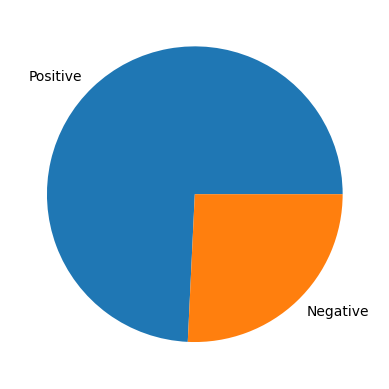

In [35]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9408, 1145) (9408,)


In [37]:
y_train_smote.value_counts()

label
0    4704
1    4704
Name: count, dtype: int64

In [38]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [41]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.92
	Recall = 0.969
	F1-Score = 0.944
Testing Scores:
	Accuracy = 0.859
	Precision = 0.67
	Recall = 0.855
	F1-Score = 0.751


In [42]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.872
	Recall = 0.955
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.857
	Precision = 0.652
	Recall = 0.916
	F1-Score = 0.762


In [43]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.816
	Precision = 0.631
	Recall = 0.624
	F1-Score = 0.628


In [44]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.866
	Precision = 0.726
	Recall = 0.741
	F1-Score = 0.734


In [45]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.869
	Precision = 0.708
	Recall = 0.805
	F1-Score = 0.753


In [46]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)